In [164]:
#Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [165]:
#Import the API key 
from config import weather_api_key

In [166]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=69a158b24be20a1b4d6de749ec841818


In [167]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [168]:
#Import the request library
import requests

In [169]:
#Create a set of random latitude and longitude combinations
lats= np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs= np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs= zip(lats, lngs)
lat_lngs

In [170]:
from citipy import citipy

In [171]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [172]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [ ]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | portobelo
Processing Record 2 of Set 1 | dalbandin
Processing Record 3 of Set 1 | port lincoln
Processing Record 4 of Set 1 | saldanha
Processing Record 5 of Set 1 | seymchan
Processing Record 6 of Set 1 | chuy
Processing Record 7 of Set 1 | roseburg
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | saint anthony
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | jishou
Processing Record 13 of Set 1 | hofn
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | salinas
Processing Record 16 of Set 1 | yako
Processing Record 17 of Set 1 | road town
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 20 of Set 1 | vardo
Processing Record 21 of Set 1 | rock sound
Processing Record 22 of Set 1 | hobart
Processing Record 23 of S

In [185]:
#Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Portobelo,9.5500,-79.6500,78.12,85,100,7.00,PA,2022-11-08 16:15:35
1,Dalbandin,28.8947,64.4101,68.00,44,45,7.47,PK,2022-11-08 16:15:36
2,Port Lincoln,-34.7333,135.8667,71.74,53,85,19.75,AU,2022-11-08 16:15:36
3,Saldanha,-33.0117,17.9442,62.51,72,94,14.88,ZA,2022-11-08 16:15:36
4,Seymchan,62.8833,152.4333,-6.27,91,100,6.02,RU,2022-11-08 16:15:37
5,Chuy,-33.6971,-53.4616,68.63,55,0,11.90,UY,2022-11-08 16:15:37
6,Roseburg,43.2165,-123.3417,40.75,94,100,4.61,US,2022-11-08 16:12:04
7,Vaini,-21.2000,-175.2000,75.36,73,75,8.05,TO,2022-11-08 16:15:38
8,Saint Anthony,45.0205,-93.2180,43.86,67,100,20.71,US,2022-11-08 16:15:38
9,Qaanaaq,77.4840,-69.3632,-6.63,76,75,7.85,GL,2022-11-08 16:15:38


In [187]:
#reorder column
new_column_order =["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Portobelo,PA,2022-11-08 16:15:35,9.5500,-79.6500,78.12,85,100,7.00
1,Dalbandin,PK,2022-11-08 16:15:36,28.8947,64.4101,68.00,44,45,7.47
2,Port Lincoln,AU,2022-11-08 16:15:36,-34.7333,135.8667,71.74,53,85,19.75
3,Saldanha,ZA,2022-11-08 16:15:36,-33.0117,17.9442,62.51,72,94,14.88
4,Seymchan,RU,2022-11-08 16:15:37,62.8833,152.4333,-6.27,91,100,6.02
5,Chuy,UY,2022-11-08 16:15:37,-33.6971,-53.4616,68.63,55,0,11.90
6,Roseburg,US,2022-11-08 16:12:04,43.2165,-123.3417,40.75,94,100,4.61
7,Vaini,TO,2022-11-08 16:15:38,-21.2000,-175.2000,75.36,73,75,8.05
8,Saint Anthony,US,2022-11-08 16:15:38,45.0205,-93.2180,43.86,67,100,20.71
9,Qaanaaq,GL,2022-11-08 16:15:38,77.4840,-69.3632,-6.63,76,75,7.85


In [190]:
#Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
#Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [189]:
#Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

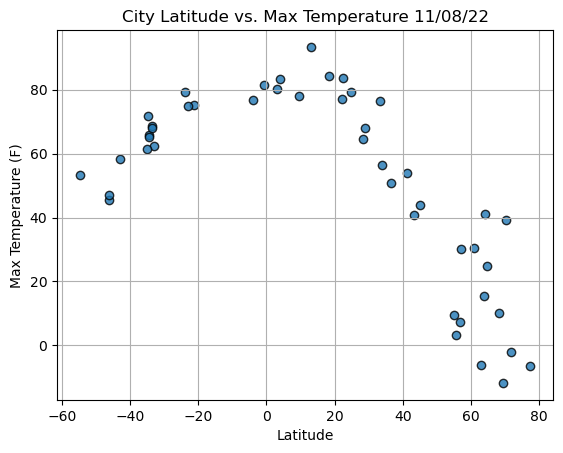

In [191]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

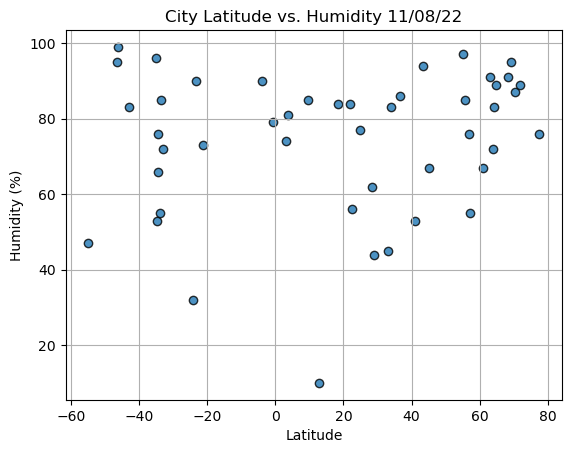

In [192]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

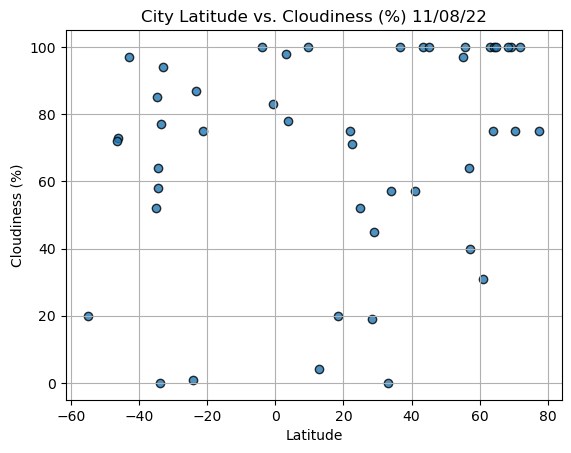

In [194]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

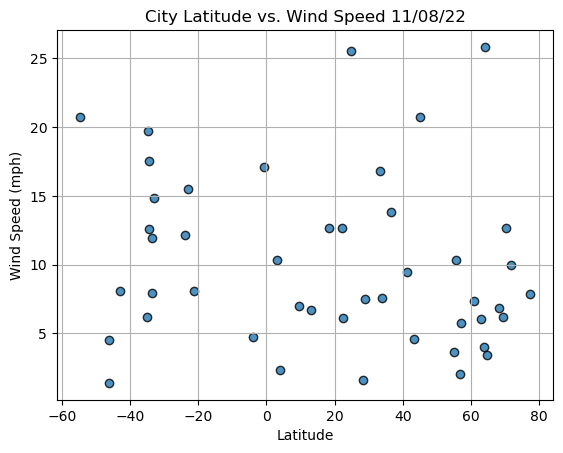

In [195]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [207]:
# Create a function to create perform linear regression on the weather data and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

# Import linregress
    from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [208]:
index13 = city_data_df.loc[13]
index13

City                  Port Alfred
Country                        ZA
Date          2022-11-08 16:15:40
Lat                      -33.5906
Lng                        26.891
Max Temp                    68.18
Humidity                       85
Cloudiness                     77
Wind Speed                   7.92
Name: 13, dtype: object

In [209]:
city_data_df["Lat"] >=0

0      True
1      True
2     False
3     False
4      True
5     False
6      True
7     False
8      True
9      True
10    False
11     True
12     True
13    False
14     True
15     True
16     True
17     True
18     True
19     True
20    False
21    False
22    False
23     True
24     True
25     True
26    False
27     True
28     True
29    False
30     True
31     True
32    False
33     True
34     True
35     True
36    False
37     True
38     True
39     True
40    False
41     True
42     True
43     True
44    False
45    False
Name: Lat, dtype: bool

In [211]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Portobelo,PA,2022-11-08 16:15:35,9.5500,-79.6500,78.12,85,100,7.00
1,Dalbandin,PK,2022-11-08 16:15:36,28.8947,64.4101,68.00,44,45,7.47
4,Seymchan,RU,2022-11-08 16:15:37,62.8833,152.4333,-6.27,91,100,6.02
6,Roseburg,US,2022-11-08 16:12:04,43.2165,-123.3417,40.75,94,100,4.61
8,Saint Anthony,US,2022-11-08 16:15:38,45.0205,-93.2180,43.86,67,100,20.71
9,Qaanaaq,GL,2022-11-08 16:15:38,77.4840,-69.3632,-6.63,76,75,7.85
11,Jishou,CN,2022-11-08 16:15:39,28.3167,109.7167,64.47,62,19,1.61
12,Hofn,IS,2022-11-08 16:15:39,64.2539,-15.2082,41.25,83,100,25.84
14,Salinas,US,2022-11-08 16:14:51,36.6777,-121.6555,50.92,86,100,13.80
15,Yako,BF,2022-11-08 16:15:40,12.9667,-2.2667,93.42,10,4,6.67


In [212]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Portobelo,PA,2022-11-08 16:15:35,9.5500,-79.6500,78.12,85,100,7.00
1,Dalbandin,PK,2022-11-08 16:15:36,28.8947,64.4101,68.00,44,45,7.47
4,Seymchan,RU,2022-11-08 16:15:37,62.8833,152.4333,-6.27,91,100,6.02
6,Roseburg,US,2022-11-08 16:12:04,43.2165,-123.3417,40.75,94,100,4.61
8,Saint Anthony,US,2022-11-08 16:15:38,45.0205,-93.2180,43.86,67,100,20.71


In [216]:
#Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)] 

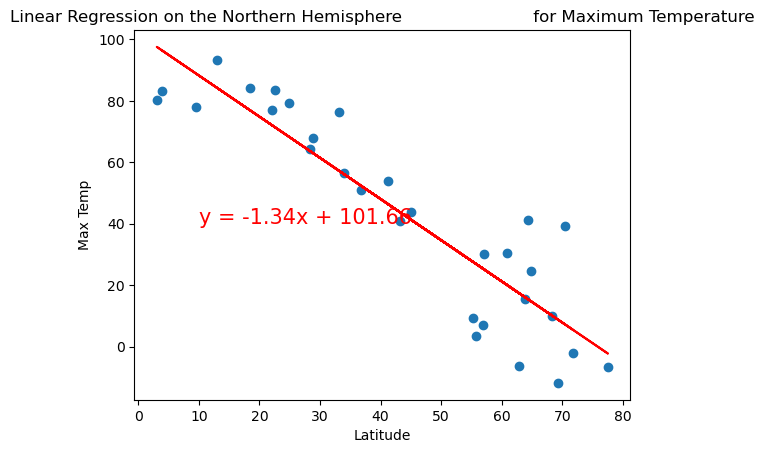

In [217]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

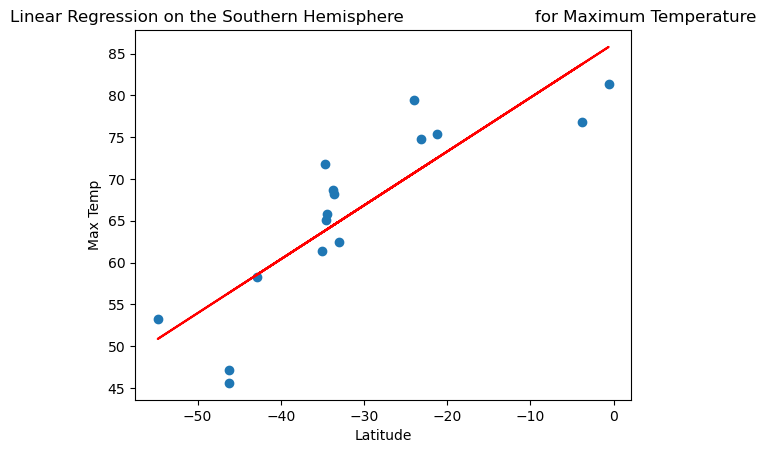

In [218]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

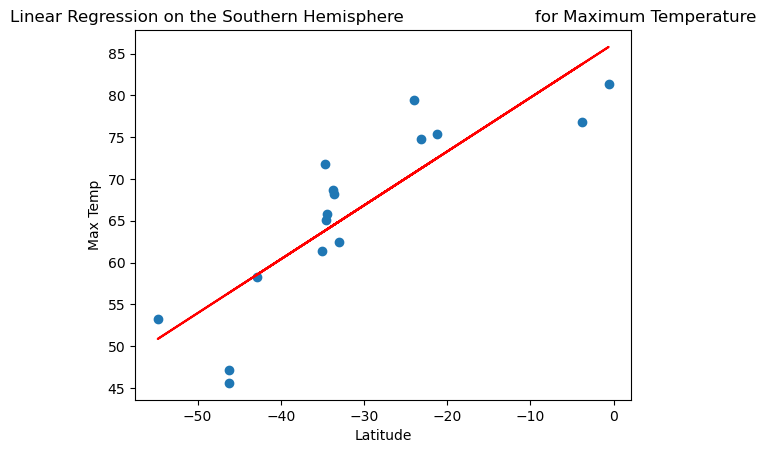

In [219]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

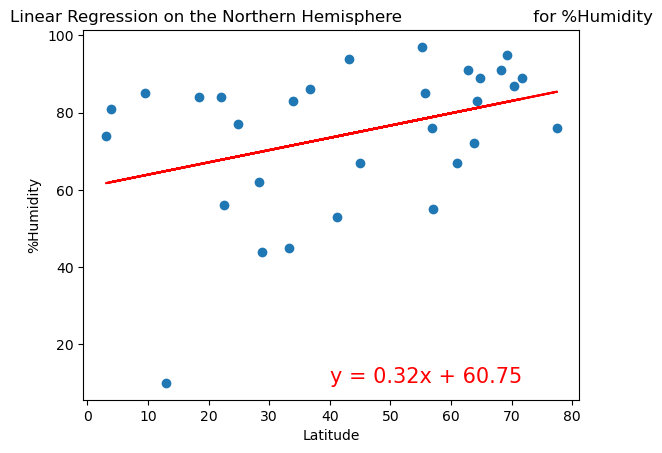

In [221]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for %Humidity', '%Humidity',(40,10))

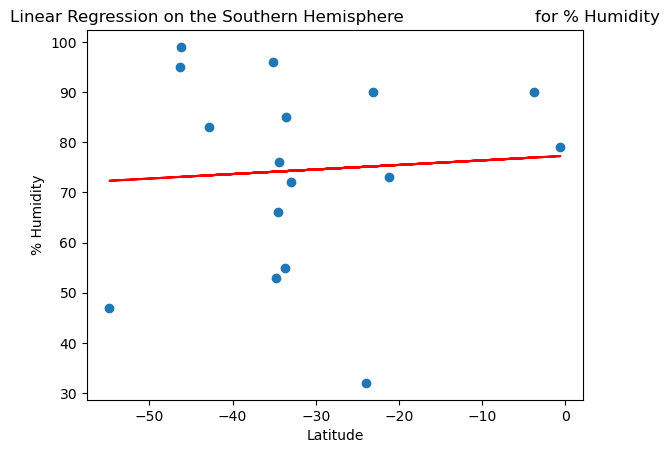

In [222]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

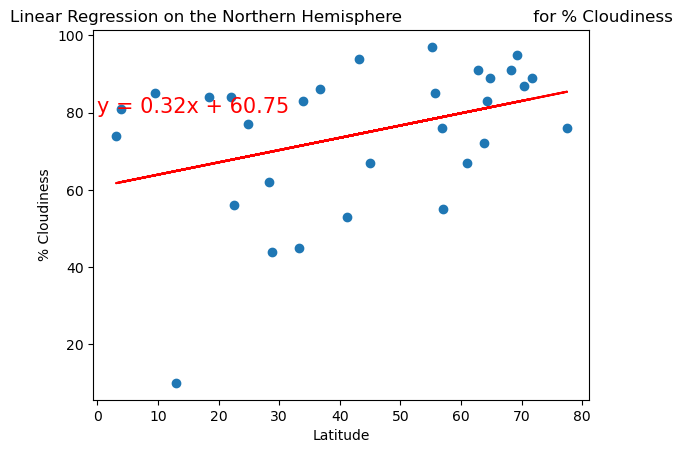

In [225]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(0,80))

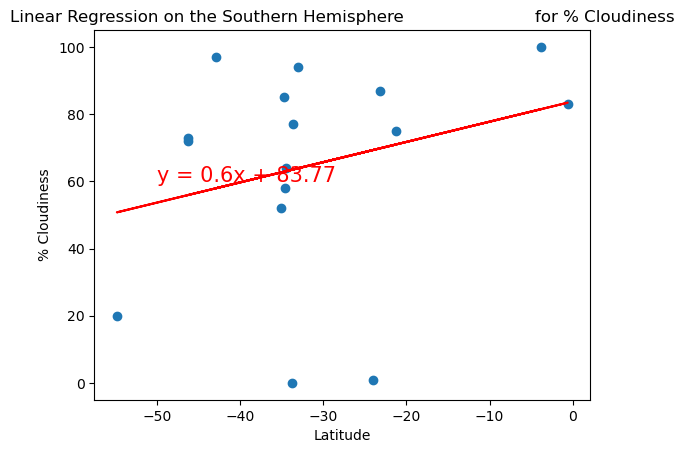

In [226]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

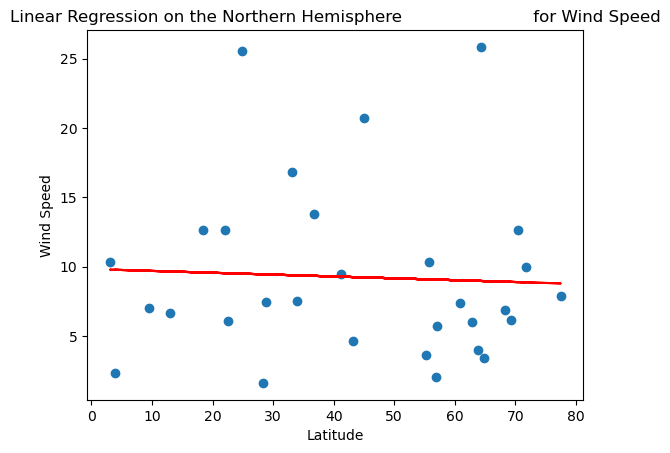

In [227]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

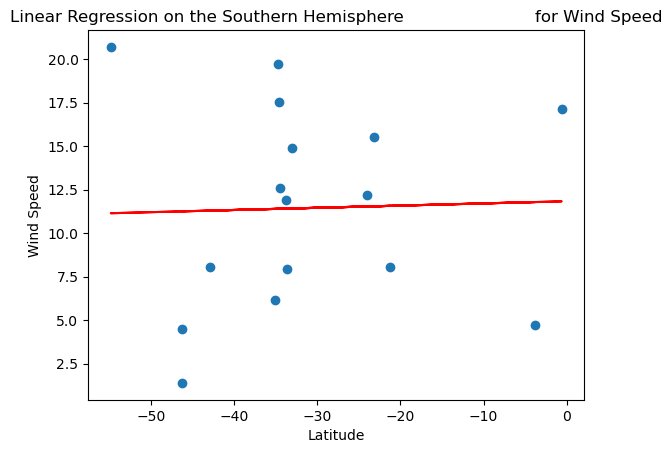

In [228]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))